In [1]:
import saxtal_functions as sax
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [96]:
filename = 'test_micrograph.mrc'
threshold_method = 'sd'
verbose = True
threads = 12
sigma = 15
quantile=0.9999
num_sd = 2.5
x_window_percent=(0, 0.7)
y_window_percent=(0, 0.995)

replace_distance_percent=0.05

In [51]:
# Handy utility to inspect source of a function.

# import inspect
# lines = inspect.getsource(sax.scipy_fft)
# print(lines)

In [52]:
# sax.mask_image(filename, 
#                threshold_method='sd', 
#                verbose=True, 
#                threads=12, 
#                sigma=9, 
#                num_sd=4.0, 
#                x_window_percent=(0.005, 0.7),
#                y_window_percent=(0.005, 0.995),
#                mask_hotpixels=False,
#                replace_distance_percent=0.05)

In [97]:
image, header = sax.import_mrc(filename)

In [98]:
padded_fft = sax.scipy_fft(image, verbose, 12)

scipy_fft(): FFT performed in 44.57 milliseconds.


In [99]:
padded_fft.shape

(3838, 1920)

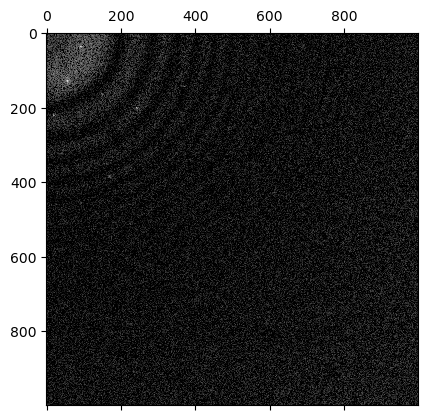

In [100]:
plt.matshow(np.log10(np.abs(padded_fft))[:1000, :1000],
           cmap = "Greys_r",
           vmax = 5,
           vmin = 2.5)

In [101]:
log_diff_spectrum, smoothed_spectrum = sax.generate_diff_spectrum(padded_fft, sigma)

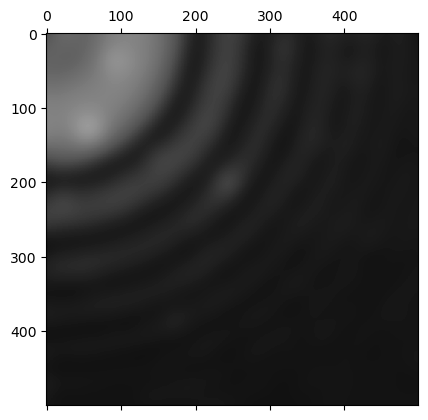

In [102]:
plt.matshow(np.log10(smoothed_spectrum)[:500, :500],
            cmap = "Greys_r",
            vmax = 4,
            vmin = 2.5)

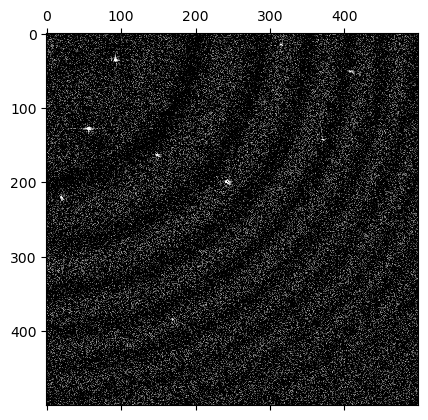

In [103]:
plt.matshow(log_diff_spectrum[0:500, 0:500],
           cmap = "Greys_r",
           vmax = 2,
           vmin = 0)

In [104]:
diffraction_spots = sax.find_diffraction_spots_sd(log_diff_spectrum, 
                                                  num_sd, 
                                                  x_window_percent, 
                                                  y_window_percent)

[-0.16971128]
[0.6434998]
[1.7607881]


In [105]:
diffraction_spots.shape

(147, 2)

In [106]:
filtered_spots = sax.remove_hotpixels(diffraction_spots, verbose=True)

100%|██████████████████████████████████████| 147/147 [00:00<00:00, 25195.65it/s]


In [107]:
filtered = diffraction_spots[filtered_spots]

In [108]:
filtered.shape

(122, 2)

(-500.0, 0.0)

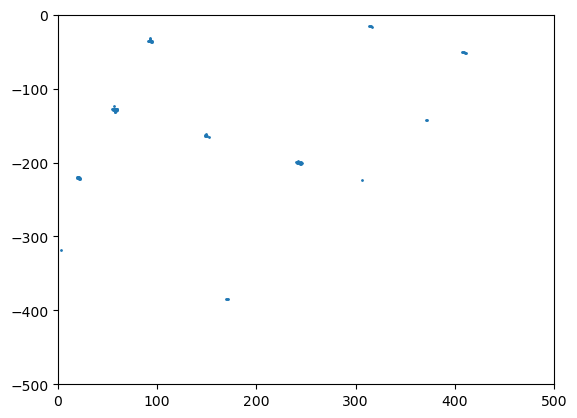

In [109]:
plt.scatter(y = -diffraction_spots[:,0], x = diffraction_spots[:,1],
            s = 1)
plt.xlim((0, 500))
plt.ylim((-500, -0))

(-500.0, 0.0)

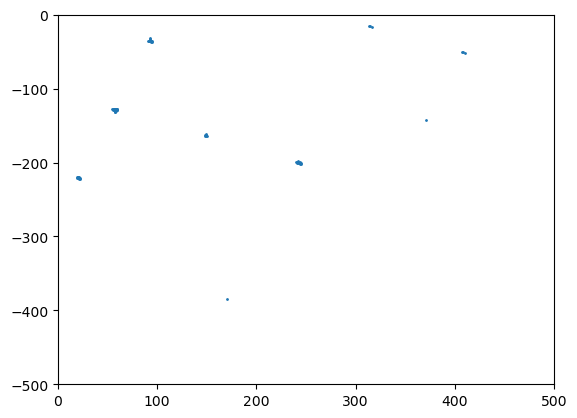

In [110]:
plt.scatter(y = -filtered[:,0], x = filtered[:,1],
            s = 1)
plt.xlim((0, 500))
plt.ylim((-500, 0))